In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston

In [33]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Abhishek Yadav\AppData\Local\Temp\ipykernel_24236\16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [34]:
data.shape

(506, 13)

In [35]:
u = np.mean(data, axis = 0)
std = np.std(data, axis = 0)

data = (data - u)/std

In [36]:
std

array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
       1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
       8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
       7.13400164e+00])

In [37]:
ones = np.ones((data.shape[0], 1))
data = np.hstack((ones,data))

In [38]:
split = 0.8
train_x = data[:int(split * data.shape[0]), :]
train_y = target[:int(split * data.shape[0]),]


test_x = data[int(split * data.shape[0]): ,:]
test_y = target[int(split * data.shape[0]): ,]

In [39]:
print(train_x.shape,train_y.shape, test_x.shape, test_y.shape )

(404, 14) (404,) (102, 14) (102,)


In [40]:
def hypothesis(x, weight):
    y_predict = 0
    for i in range(x.shape[0]):
        y_predict += weight[i] * x[i]
    return(y_predict)

In [41]:
def loss(x, y, weight):
    error = 0

    for i in range(x.shape[0]):
        y_predicted = hypothesis(x[0], weight)
        error +=(y_predicted - y[i])**2
    return error/x.shape[0]
        

In [42]:
def gradient(x, y, weight ):
    
    grad = np.zeros((x.shape[1],))
    
    for j in range(x.shape[1]):
        for k in range(x.shape[0]):
            y_predict = hypothesis(x[k], weight)
            
            grad[j] += (y_predict - y[k])* x[k][j]
    
    return grad/x.shape[0]

In [43]:
def gradient_descent(X_train, Y_train):
    
    weight = np.zeros((X_train.shape[1], ))
    cost = []
    lr_rate = 0.03
    
    epochs = 1000
    
    for i in range(epochs):
        cost.append(loss(X_train, Y_train, weight))
        print(f'\r on {i}', end='\r')        
        grad = gradient(X_train, Y_train, weight)
        
        
        for j in range(X_train.shape[1]):
            weight[j] = weight[j] - lr_rate * grad[j]
        
    return weight, cost

In [44]:
weight, cost = gradient_descent(train_x, train_y)

In [45]:
cost

[670.0209405940592,
 547.1983238198852,
 451.6935178658678,
 376.9751297403917,
 318.1694351900399,
 271.62123450542106,
 234.57490096330267,
 204.94187088150272,
 181.13049313509615,
 161.92101266177906,
 146.37333407199048,
 133.75867986007415,
 123.50873266639906,
 115.1776214705376,
 108.41338144165775,
 102.93643059821572,
 98.52326550265653,
 94.99405532648677,
 92.20316020366198,
 90.03185247160047,
 88.3827043186125,
 87.17524121584091,
 86.34256072748224,
 85.82869051804118,
 85.5865145764209,
 85.57613789846592,
 85.76359077788153,
 86.11979712366973,
 86.61974880756686,
 87.24184138593881,
 87.96733669867703,
 88.7799256094099,
 89.66537010194716,
 90.6112085244923,
 91.60651130367943,
 92.64167718185192,
 93.70826214986896,
 94.79883489573895,
 95.9068538743982,
 97.02656210836686,
 98.15289661599172,
 99.28140998207702,
 100.40820207232245,
 101.52986027706801,
 102.64340697378802,
 103.74625313895726,
 104.83615723188827,
 105.91118862641667,
 106.96969498914831,
 108.010

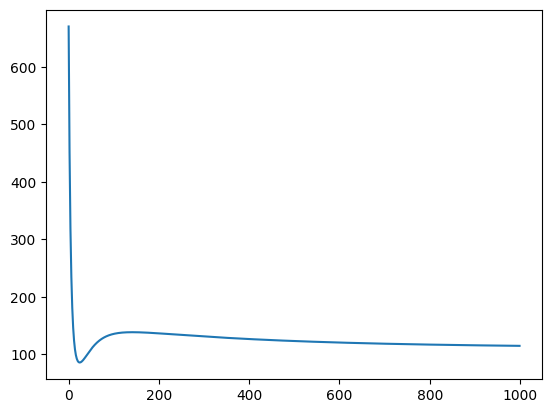

In [47]:
plt.plot(cost)